# Excercise - Data Cleaning and Visualization
This notebook will cover the following:
 - Reading in data using csv
 - Reading in data using pandas
 - Data visualization using matplotlib and seaborn

In [1]:
import csv 
import numpy as np
import os
import pandas as pd
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from pathlib import Path

In [2]:
DSDATA = Path(os.getenv('DSDATA'))
DSDATA

PosixPath('/Users/macbookpro/Desktop/DLSU/9th_Term/DATASCI/DSDATA')

## Data Files

Kindly download the following files from Kaggle (https://www.kaggle.com/starbucks/starbucks-menu) and move them to the folder defined under your DSDATA.

- starbucks_drinkMenu_expanded.csv

This dataset includes the nutritional information for Starbucks’ food and drink menu items. All nutritional information for drinks are for a 12oz serving size.

In [3]:
file_nutrition = DSDATA / 'starbucks_drinkMenu_expanded.csv'

### Pandas

`pandas` is a powerful library capable of reading csv, tsv and even Excel files.

Once it reads in your file, it is represented in a tabular format which is a form of **structured** data. When data is loaded, it is called a `DataFrame`.

In [4]:
if file_nutrition.exists():
    print('File exists!')
else:
    print('Please download file and place insisde DSdata folder.')
    
data2 = pd.read_csv(file_nutrition)
data2.head() #check the columns and rows for the first 5 menu items


File exists!


Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75

### Table 1. Nutrition menu of starbucks (as of july 20, 2017)

The table above displays the data read in from the csv file which contains the nutrition facts fot starbucks in 2017. This data was filtered and downloaded from the [kaggle](https://www.kaggle.com/starbucks/starbucks-menu).

The main function to read in data using pandas is `pd.read_csv()`.

To have a preview of the data, we called `df_heat.head()` which displays the first 5 rows of the `DataFrame`. If you want to limit, or show more data, simply pass any number into the `head` function.

### Q1 : getting to know your dataset 
1. How many rows?
2. What columns?
3. Data types per column?


In [5]:
#Q1.1 = 242
#Q1.2 = 18
data2.shape

(242, 18)

In [6]:
#Q1.3
data2.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

## Data Cleaning

Now that we've read in the data. Let's start exploring and see how *"clean"* this data is.

### Common Data Problems (from slides)

1. Missing values
2. Formatting issues / data types
3. Varying representation / Handle categorical values

### Q2 : Missing values
1. Check how many columns have null values?
2. What to do with the null entries?

In [7]:
#Q2.1
data2.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [8]:
#Q2.2
data2['Caffeine (mg)']=data2['Caffeine (mg)'].fillna('0')

In [9]:
data2['Caffeine (mg)'].isnull().sum()

0

It is observed that there are no more null values in the dataset

### Q3 : Formatting issues / data types 
1. Vitamin A (% DV) , Vitamin C (% DV) , Calcium (% DV) , Iron (% DV) and Caffeine (mg) are supposed to be a integers, why are they read as objects? 
2. How do we convert the these data into integer?
3. Why does the column Caffeine (mg) have a "Varies" value? 

In [10]:
# get random samples
data2.sample(5)

Beverage_category  \
133                   Tazo® Tea Drinks   
170              Shaken Iced Beverages   
209        Frappuccino® Blended Coffee   
219  Frappuccino® Light Blended Coffee   
0                               Coffee   

                                              Beverage      Beverage_prep  \
133                          Tazo® Full-Leaf Tea Latte   Tall Nonfat Milk   
170  Shaken Iced Tazo® Tea Lemonade (With Classic S...             Grande   
209                  Java Chip (Without Whipped Cream)         Whole Milk   
219                                             Coffee  Venti Nonfat Milk   
0                                        Brewed Coffee              Short   

     Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
133       120            0.1             0.1                0.0             5   
170       130              0             0.0                0.0             0   
209       240              5             3.5                0.1            10   
219       160            0.1             0.1                0.0             5   
0           3            0.1             0.0                0.0             0   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
133                         65                23                   0   
170                          0                33                   0   
209                        170                47                   1   
219                        270                34                   0   
0                            5                 0                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
133           23            5.0               10%               0%   
170           33            0.1                0%              15%   
209           44            4.0                4%               0%   
219           33            5.0                8%               0%   
0              0            0.3                0%               0%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
133              20%        0.00%        varies  
170               0%           0%        Varies  
209               8%          20%            75  
219              15%           2%           120  
0                 0%           0%           175

### Table 2. Random sample of the nutrition menu of starbucks 

The table above displays 5 random samples from the dataset. Random samples give an accurate resprentations of the population, hence this was used to check the values of the incorrectly formated columns.

To have a preview of the sample from the dataset, we called `data2.sample(5)` which displays the 5 random rows of the `DataFrame`. If you want to limit, or show more data, simply pass any number into the `sample` function. By default if no integer was passed it would only return one random sample.

Q3.1 <b>answer : </b>As seen in Table 2, all of the columns that contain the string "%" are considered as strings, thus needing to remove these percentage to be able to consider these columns an integer. on the other hand the "Caffeine (mg)" column contains the word "Varies", resulting to the computer to count it as a string. 

In [11]:
#Q3.2 remove the % in the dataset
data_cleaned = data2.replace({'%': '','varies': '0','Varies': '0'}, regex=True) #we replaced "%" to "" and now  the word "varies"/"Varies" to 0
data_cleaned.iloc[:,-5:] = data_cleaned.iloc[:,-5:].apply(pd.to_numeric) # make the last 5 columns into an integer data type

**replacing to strings :** <br>
- `data2.replace({'%': '','varies': '0','Varies': '0'})`  is a dictionary, and it was used to replace '%' to '', the word 'varies' to '0' and 'Varies' to '0'.The parameter `regex=True` means that the object column would turn into a string so we can replace "%" to "".

**converting to integer :** <br>
- `data2.iloc[:,-5:]` data2.`iloc` means we are accessing the dataframe using integers and `[:,-5:]` means  we are accesing all the rows and the last 5 columns only.
- we used `.apply(pd.to_numeric)` to be able to convert the last 5 columns it's(string) corresponding numerical value.

In [12]:
display(data_cleaned.head(5))

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0            0            0.3                  0                 0   
1            0            0.5                  0                 0   
2            0            1.0                  0                 0   
3            0            1.0                  0                 0   
4            9            6.0                 10                 0   

    Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
0                 0           0.0            175  
1                 0           0.0            260  
2                 0           0.0            330  
3                 2           0.0            410  
4                20           0.0             75

### Table 3. Removed the '%' and replaces both 'varies' and 'Varies' to 0 

we can see that '%' was now removed to the dataset, we convert Caffeine (mg) to numerical values then we can convert the last 5 columns into integers.

In [13]:
data_cleaned.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                  float64
Caffeine (mg)                  int64
dtype: object

we can now see that the last 5 data types are considered numeric

In [14]:
data2[data2['Caffeine (mg)'].str.contains("Varies|varies")]

Beverage_category                                           Beverage  \
102       Tazo® Tea Drinks                                          Tazo® Tea   
103       Tazo® Tea Drinks                                          Tazo® Tea   
104       Tazo® Tea Drinks                                          Tazo® Tea   
105       Tazo® Tea Drinks                                          Tazo® Tea   
130       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
131       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
132       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
133       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
134       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
135       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
136       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
137       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
138       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
139       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
140       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
141       Tazo® Tea Drinks                          Tazo® Full-Leaf Tea Latte   
167  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
168  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
169  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
170  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
171  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
172              Smoothies                          Banana Chocolate Smoothie   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
102               Short         0              0             0.0   
103                Tall         0              0             0.0   
104              Grande         0              0             0.0   
105               Venti         0              0             0.0   
130   Short Nonfat Milk        80            0.1             0.1   
131             2% Milk        90              2             1.0   
132             Soymilk        80            1.5             0.2   
133    Tall Nonfat Milk       120            0.1             0.1   
134             2% Milk       140              3             1.5   
135             Soymilk       130            2.5             0.3   
136  Grande Nonfat Milk       150            0.2             0.1   
137             2% Milk       190              4             2.0   
138             Soymilk       170            3.5             0.4   
139   Venti Nonfat Milk       190            0.2             0.1   
140             2% Milk       230              5             2.5   
141             Soymilk       210              4             0.5   
167              Grande        80              0             0.0   
168               Venti       120              0             0.0   
169                Tall       100              0             0.0   
170              Grande       130              0             0.0   
171               Venti       190              0             0.0   
172  Grande Nonfat Milk       280            2.5             1.5   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
102                0.0             0                          0   
103                0.0             0                          0   
104                0.0             0                          0   
105                0.0             0                          0   
130                0.0             0                         45   
131                0.1            10                         50   
132                0.0             0                         40   
133                0.0             5        

### Table 4. Drinks that has 'Varies' or 'varies' as caffeine amount 

- Table above displays all the drinks that have 'varies' or 'Varies'as an amount in the "Caffeine (mg)" column.
- `data2['Caffeine (mg)'].str.contains("Varies|varies")`(inner condition) returns a list containing `True` or `False`, the index that has a corresponding `True` value means that the corresponding entry contains **"Varies"** or **"varies"**. 
- We add `data2[  ]`  outside of `data2['Caffeine (mg)'].str.contains("Varies|varies")` , which means we return a table where the row value should be `True`(by the inner condition)

Q3.3 <b>answer : </b>As seen in Table 4, all of the drinks that have a **varies**/**Varies** as caffeine amount are all Teas, since the caffeine amount depends on how long the tea was soaked.

### Q4 Aggregation

1. What is the total caffeine of all the stabucks drinks in 2017?
2. What is the total carbs of all the stabucks drinks in 2017?
3. What is the lowest sugar content drink in starbucks in 2017?

In [15]:
#Q4.1
data_cleaned['Caffeine (mg)'].sum()
#there are 19605 (mg) of caffeine in the strarbucks drink menu in 2017

19605

In [16]:
#Q4.2
data_cleaned['Calories'].sum()
#there are 46917 calories in the whole strarbucks drink menu in 2017

46917

In [17]:
#Q4.3
data_cleaned[' Sugars (g)'].min() # =0
data_cleaned[data_cleaned[' Sugars (g)']==0]['Beverage'].unique()
#get only the beverage column and output the unique values


array(['Brewed Coffee', 'Caffè Americano', 'Espresso', 'Tazo® Tea'],
      dtype=object)

## Sort
- sort by size and reset the index to be able to plot by the size of the drink

In [18]:
short = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Short')]
tall = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Tall')]
grande = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Grande')]
venti = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Venti')]

s_c = short.append([tall,grande,venti])
s_c = s_c.sort_index()


#pd.concat(short,tall,ignore_index=True)

## Visualization
1. Visualizing relationships of two features (scatter plot).
2. Caffeine per drink in relation to size (horizontal stacked bar plot).

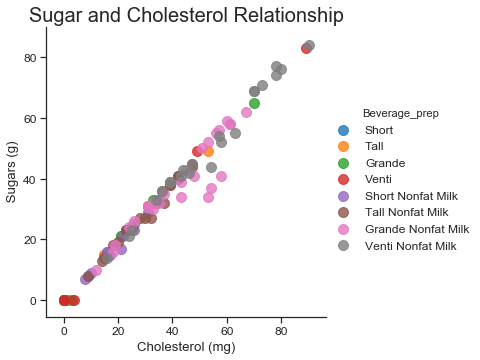

In [19]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Cholesterol (mg)', # Horizontal axis
           ' Sugars (g)', # Vertical axis
           data=s_c, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Beverage_prep", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.title("Sugar and Cholesterol Relationship", fontsize=20)
plt.show()

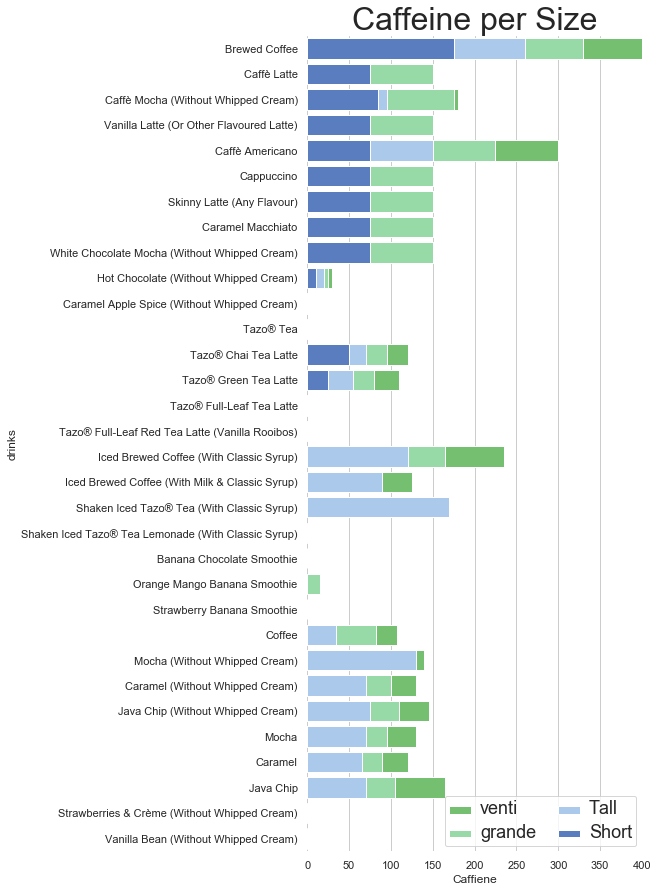

In [20]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
fig = matplotlib.rcParams.update({'font.size':8})

#plot caffiene level per size(venti)
sns.set_color_codes("muted")
sns.barplot(x = venti['Caffeine (mg)'],y = s_c['Beverage'],
            label = "venti", color="g",ci=None)
#plot caffiene level per size(grande)
sns.set_color_codes("pastel")
sns.barplot(x = grande['Caffeine (mg)'],y = s_c['Beverage'],
            label="grande", color="g",ci = None)
#plot caffiene level per size(tall)
sns.set_color_codes("pastel")
sns.barplot(x = tall['Caffeine (mg)'],y = s_c['Beverage'],
            label = "Tall", color = "b",ci = None)
#plot caffiene level per size(short)
sns.set_color_codes("muted")
sns.barplot(x = short['Caffeine (mg)'], y = s_c['Beverage'],
            label = 'Short', color ='b',ci = None)


ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(xlim = (0, 400),ylabel= "drinks",
       xlabel ="Caffiene")

plt.setp(ax.get_legend().get_title(), fontsize = '18')
plt.setp(ax.get_legend().get_texts(), fontsize = '18')
plt.title("Caffeine per Size", fontsize = 32)
sns.despine(left=True, bottom=True)
plt.show()



### Q5 Visualization

1. The relationship between Calories and Carbohydrates.
2. Sugar content per size.

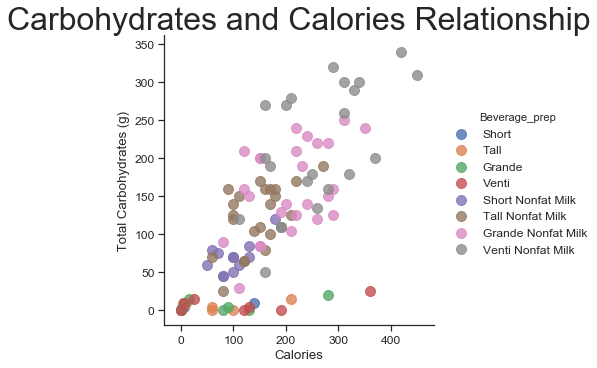

In [27]:
#Q5.1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Calories', # Horizontal axis
           ' Total Carbohydrates (g) ', # Vertical axis
           data=s_c, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Beverage_prep", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.title("Carbohydrates and Calories Relationship", fontsize=32)

plt.show()



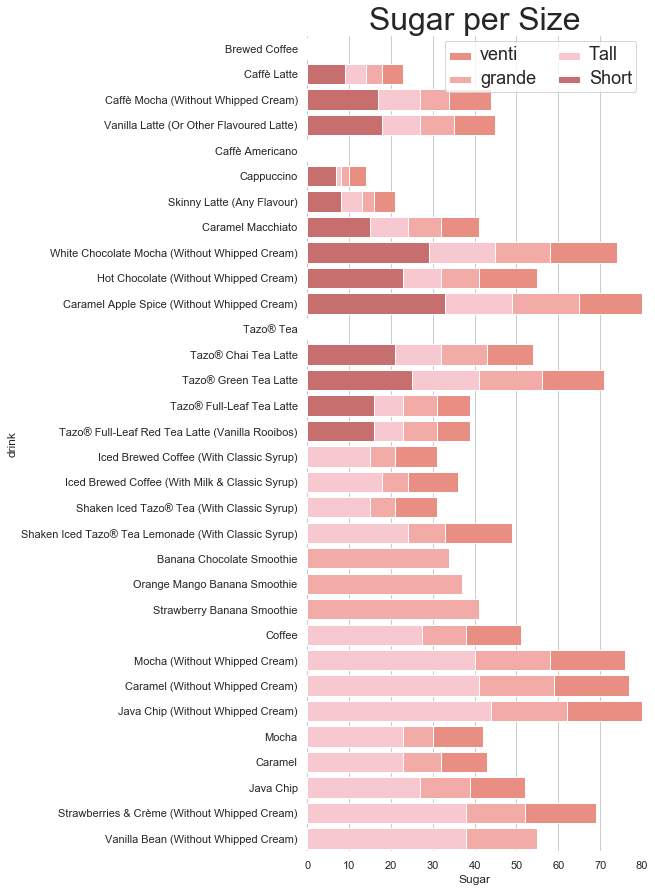

In [26]:
#Q5.2
f, ax = plt.subplots(figsize=(6, 15))
f =matplotlib.rcParams.update({'font.size':10})

#plot caffiene level per size(short)

sns.set_color_codes("pastel")
sns.barplot(x=venti[' Sugars (g)'],y=s_c['Beverage'],
            label="venti", color="salmon",ci=None)


sns.set_color_codes("pastel")
sns.barplot(x=grande[' Sugars (g)'],y=s_c['Beverage'],
            label="grande", color="r",ci=None)

sns.set_color_codes("pastel")
sns.barplot(x=tall[' Sugars (g)'],y=s_c['Beverage'],
            label="Tall", color="pink",ci=None)

sns.set_color_codes("muted")
sns.barplot(x=short[' Sugars (g)'], y=s_c['Beverage'],
            label="Short", color="r",ci=None)




ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 80), ylabel="drink",
       xlabel="Sugar")

sns.despine(left=True, bottom=True)


plt.title("Sugar per Size", fontsize=32)
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

# END (TO DELETE CODES AFTER THIS)

# Cleaning the data 

# Filtering the datatype

In [4]:
data2[' Total Fat (g)']=pd.to_numeric(data2[' Total Fat (g)'], errors='coerce')
data2['Caffeine (mg)']=pd.to_numeric(data2['Caffeine (mg)'], errors='coerce')
data2[[data2.columns[13],data2.columns[14],data2.columns[15],data2.columns[16]]] = data2[[data2.columns[13],data2.columns[14],data2.columns[15],data2.columns[16]]].apply(pd.to_numeric) 
data2[data2.columns[13] ]=pd.to_numeric(data2[data2.columns[13]],errors='coerce')
data2=data2[data2['Beverage']!='Tazo® Tea']
#data2.sort_values(by="Caffeine (mg)")



In [5]:
cpy=data2.copy()

# Getting the info of the dataset

In [6]:
data2.info()
data2.describe()
#data2.iloc[1:4]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 241
Data columns (total 18 columns):
Beverage_category            238 non-null object
Beverage                     238 non-null object
Beverage_prep                238 non-null object
Calories                     238 non-null int64
 Total Fat (g)               237 non-null float64
Trans Fat (g)                238 non-null float64
Saturated Fat (g)            238 non-null float64
 Sodium (mg)                 238 non-null int64
 Total Carbohydrates (g)     238 non-null int64
Cholesterol (mg)             238 non-null int64
 Dietary Fibre (g)           238 non-null int64
 Sugars (g)                  238 non-null int64
 Protein (g)                 238 non-null float64
Vitamin A (% DV)             238 non-null int64
Vitamin C (% DV)             238 non-null int64
 Calcium (% DV)              238 non-null int64
Iron (% DV)                  238 non-null float64
Caffeine (mg)                238 non-null int64
dtypes: float64(5)

Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  238.000000      237.000000      238.000000         238.000000   
mean   197.130252        2.952743        1.328992           0.038235   
std    100.570419        2.950819        1.645156           0.071808   
min      3.000000        0.000000        0.000000           0.000000   
25%    120.000000        0.200000        0.100000           0.000000   
50%    190.000000        2.500000        0.500000           0.000000   
75%    260.000000        4.500000        2.000000           0.100000   
max    510.000000       15.000000        9.000000           0.300000   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    238.000000                 238.000000        238.000000   
mean       6.470588                 131.050420         36.596639   
std        8.662761                  81.259323         20.433000   
min        0.000000                   0.000000          0.000000   
25%        0.000000                  70.000000         21.000000   
50%        5.000000                 125.000000         35.000000   
75%       10.000000                 177.500000         51.000000   
max       40.000000                 340.000000         90.000000   

        Dietary Fibre (g)   Sugars (g)   Protein (g)   Vitamin A (% DV)   \
count          238.000000   238.000000     238.000000         238.000000   
mean             0.819328    33.516807       7.095798           9.995798   
std              1.454269    19.421750       4.826787           8.063827   
min              0.000000     0.000000       0.000000           0.000000   
25%              0.000000    19.000000       3.000000           4.000000   
50%              0.000000    32.000000       6.000000           8.000000   
75%              1.000000    44.000000      10.000000          15.000000   
max              8.000000    84.000000      20.000000          50.000000   

       Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
count        238.000000        238.000000    238.000000     238.000000  
mean           3.710084         21.105042      7.571429      82.373950  
std           14.535131         14.410260     10.529502      66.669843  
min            0.000000          0.000000      0.000000       0.000000  
25%            0.000000         10.000000      0.000000      16.250000  
50%            0.000000         20.000000      2.000000      75.000000  
75%            0.000000         30.000000     10.000000     130.000000  
max          100.000000         60.000000     50.000000     410.000000

In [7]:
data2.shape


(238, 18)

In [8]:
#data2.groupby('Beverage').Beverage.count()


In [9]:
fig = plt.figure(figsize=(250,250))
fig = matplotlib.rcParams.update({'font.size': 100})
drink_no=[x for x in range(238)]

colors=np.array(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

for i in range(15):
    xi = plt.subplot2grid((5,3),(i%5,i%3),rowspan=1,colspan=1)
    xi.plot(drink_no,data2[data2.columns[i+3]].values,label=data2.columns[i+3],color=colors[i%10],linewidth=20)
    xi.set_title(data2.columns[i+3])
    
plt.legend()
plt.show()

# Does Size affect the amount of caffeine

In [10]:
short = data2[data2['Beverage_prep'].str.contains('Short')]
tall = data2[data2['Beverage_prep'].str.contains('Tall')]
grande = data2[data2['Beverage_prep'].str.contains('Grande')]
venti = data2[data2['Beverage_prep'].str.contains('Venti')]

s_c=short.append([tall,grande,venti])
s_c=s_c.sort_index()


#pd.concat(short,tall,ignore_index=True)

In [11]:
s_c.describe()


Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  104.000000       104.00000      104.000000              104.0   
mean   170.980769         0.82500        0.566346                0.0   
std     96.741572         1.41241        1.083021                0.0   
min      3.000000         0.00000        0.000000                0.0   
25%    100.000000         0.10000        0.000000                0.0   
50%    160.000000         0.20000        0.100000                0.0   
75%    232.500000         1.00000        0.500000                0.0   
max    450.000000         7.00000        6.000000                0.0   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    104.000000                 104.000000        104.000000   
mean       3.317308                 123.019231         35.394231   
std        3.313006                  88.740265         21.013365   
min        0.000000                   0.000000          0.000000   
25%        0.000000                  50.000000         20.750000   
50%        5.000000                 120.000000         33.000000   
75%        5.000000                 180.000000         48.250000   
max       10.000000                 340.000000         90.000000   

        Dietary Fibre (g)   Sugars (g)   Protein (g)   Vitamin A (% DV)   \
count           104.00000   104.000000     104.000000         104.000000   
mean              0.50000    33.028846       6.436538           9.951923   
std               1.23854    19.890212       5.138094           8.815674   
min               0.00000     0.000000       0.000000           0.000000   
25%               0.00000    18.750000       3.000000           4.000000   
50%               0.00000    32.000000       5.000000           8.000000   
75%               0.25000    43.250000       9.250000          15.000000   
max               7.00000    84.000000      20.000000          50.000000   

       Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
count        104.000000        104.000000    104.000000     104.000000  
mean           3.028846         18.153846      4.730769      88.750000  
std           12.954331         14.998232      8.792352      77.364821  
min            0.000000          0.000000      0.000000       0.000000  
25%            0.000000         10.000000      0.000000      13.750000  
50%            0.000000         15.000000      0.000000      75.000000  
75%            0.000000         26.250000      4.500000     141.250000  
max          100.000000         60.000000     35.000000     410.000000

In [12]:
sns.set(style="whitegrid")


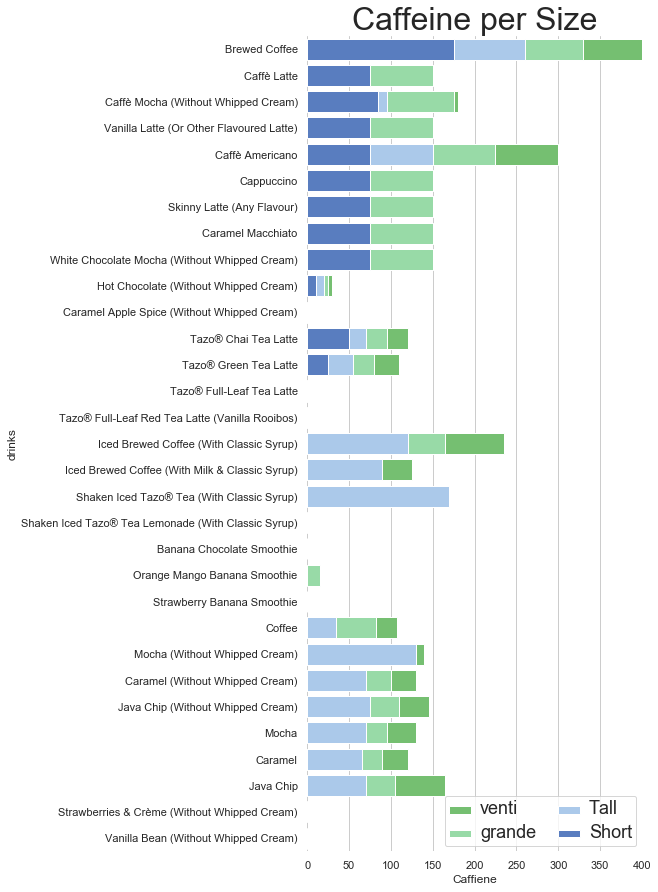

In [13]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
fig =matplotlib.rcParams.update({'font.size':8})

#plot caffiene level per size(venti)
sns.set_color_codes("muted")
sns.barplot(x=venti['Caffeine (mg)'],y=s_c['Beverage'],
            label="venti", color="g",ci=None)
#plot caffiene level per size(grande)
sns.set_color_codes("pastel")
sns.barplot(x=grande['Caffeine (mg)'],y=s_c['Beverage'],
            label="grande", color="g",ci=None)
#plot caffiene level per size(tall)
sns.set_color_codes("pastel")
sns.barplot(x=tall['Caffeine (mg)'],y=s_c['Beverage'],
            label="Tall", color="b",ci=None)
#plot caffiene level per size(short)
sns.set_color_codes("muted")
sns.barplot(x=short['Caffeine (mg)'], y=s_c['Beverage'],
            label='Short', color='b',ci=None)


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400),ylabel= "drinks",
       xlabel ="Caffiene")

plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.title("Caffeine per Size", fontsize=32)
sns.despine(left=True, bottom=True)
plt.show()


# As the size increases the amount of caffeine increases <br>
 note: tazao teas have varies as their caffeine so i made their caffeine to 0
 

# Size affects the sugar amount per drink

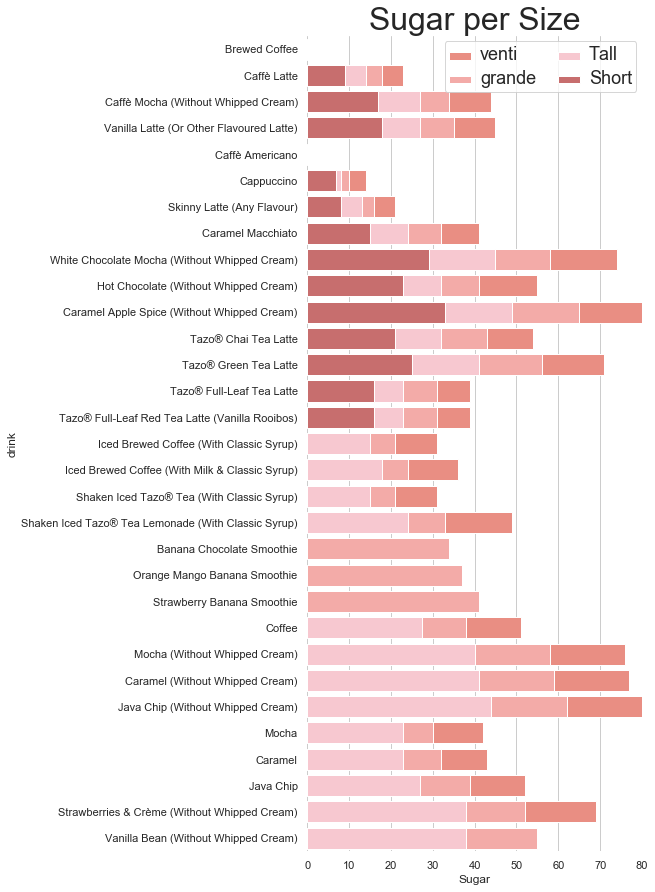

In [14]:
f, ax = plt.subplots(figsize=(6, 15))
f =matplotlib.rcParams.update({'font.size':10})

#plot caffiene level per size(short)

sns.set_color_codes("pastel")
sns.barplot(x=venti[' Sugars (g)'],y=s_c['Beverage'],
            label="venti", color="salmon",ci=None)


sns.set_color_codes("pastel")
sns.barplot(x=grande[' Sugars (g)'],y=s_c['Beverage'],
            label="grande", color="r",ci=None)

sns.set_color_codes("pastel")
sns.barplot(x=tall[' Sugars (g)'],y=s_c['Beverage'],
            label="Tall", color="pink",ci=None)

sns.set_color_codes("muted")
sns.barplot(x=short[' Sugars (g)'], y=s_c['Beverage'],
            label="Short", color="r",ci=None)




ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 80), ylabel="drink",
       xlabel="Sugar")

sns.despine(left=True, bottom=True)


plt.title("Sugar per Size", fontsize=32)
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

# Graph Summary
The larger the size the higher the amount of sugar in the drink

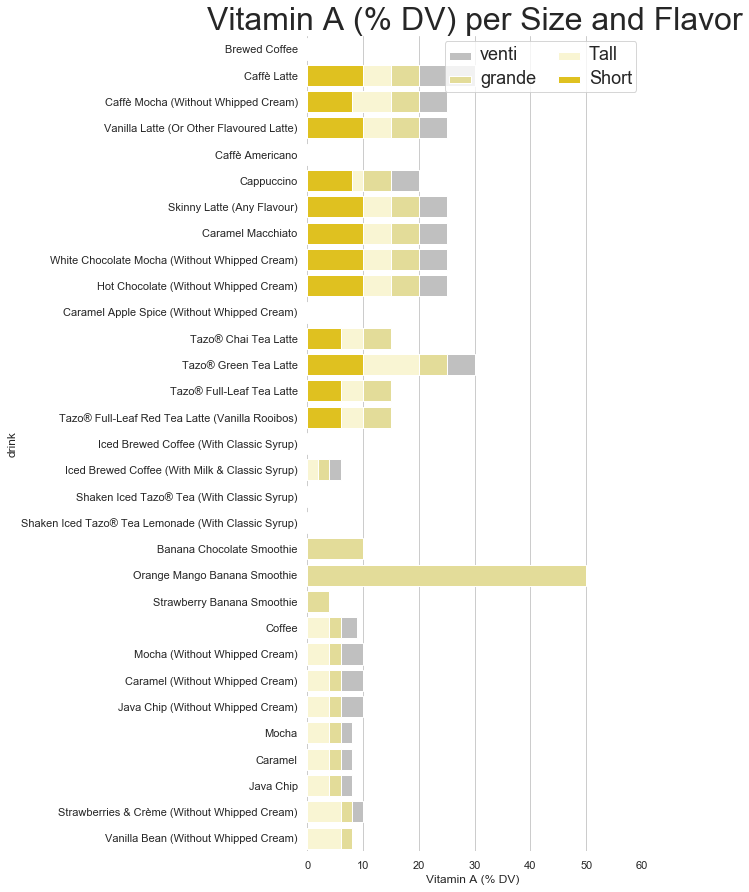

In [15]:
f, ax = plt.subplots(figsize=(6, 15))
f =matplotlib.rcParams.update({'font.size':10})

#plot caffiene level per size(short)

sns.set_color_codes("pastel")
sns.barplot(x=venti['Vitamin A (% DV) '],y=s_c['Beverage'],
            label="venti", color="silver",ci=None)


sns.set_color_codes("pastel")
sns.barplot(x=grande['Vitamin A (% DV) '],y=s_c['Beverage'],
            label="grande", color="khaki",ci=None)

sns.set_color_codes("pastel")
sns.barplot(x=tall['Vitamin A (% DV) '],y=s_c['Beverage'],
            label="Tall", color="lemonchiffon",ci=None)

sns.set_color_codes("muted")
sns.barplot(x=short['Vitamin A (% DV) '], y=s_c['Beverage'],
            label="Short", color="gold",ci=None)




ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 60), ylabel="drink",
       xlabel="Vitamin A (% DV) ")

sns.despine(left=True, bottom=True)


plt.title("Vitamin A (% DV) per Size and Flavor", fontsize=32)
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

# Graph Summary
The vitamin A increases as the size increases .
The realtionship is directly propotional

In [16]:
s_c.columns


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

# Does higher Calories  mean higher Carbohydrates in respect to their sizes?


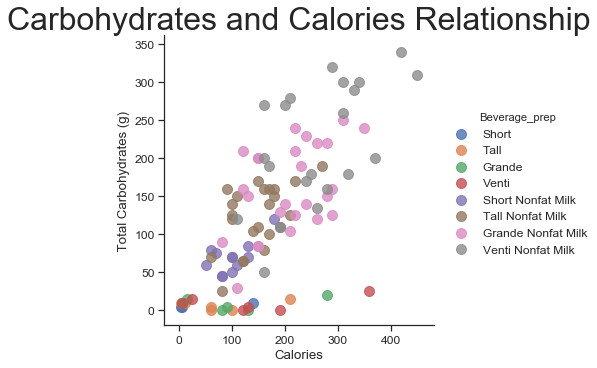

In [17]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Calories', # Horizontal axis
           ' Total Carbohydrates (g) ', # Vertical axis
           data=s_c, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Beverage_prep", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.title("Carbohydrates and Calories Relationship", fontsize=32)

plt.show()


# CONCLUSION :
    |Sizes                             |Carbohydrates          |Calories      |
    |----------------------------------|-----------------------|--------------|
    |Short                             |Low                    |Low           |
    |----------------------------------|-----------------------|--------------|
    |Short with nonfat milk            |Low to medium          |Low to medium |
    |----------------------------------|-----------------------|--------------|
    |Tall                              |Low                    |Low to medium |
    |----------------------------------|-----------------------|--------------|
    |Tall with nonfat milk             |Low to medium          |Low to medium |
    |----------------------------------|-----------------------|--------------|
    |Grande                            |Low                    |Low to high   |
    |----------------------------------|-----------------------|--------------|
    |Grande with nonfat milk           |Medium                 |Medium        |
    |----------------------------------|-----------------------|--------------|
    |Venti                             |Low                    |Low to high   |
    |----------------------------------|-----------------------|--------------|
    |Venti with nonfat milk            |Medium to high         |Medium to high|
    
    
    
    
    

# Does higher Sugar  mean higher Cholesterol in respect to their sizes?


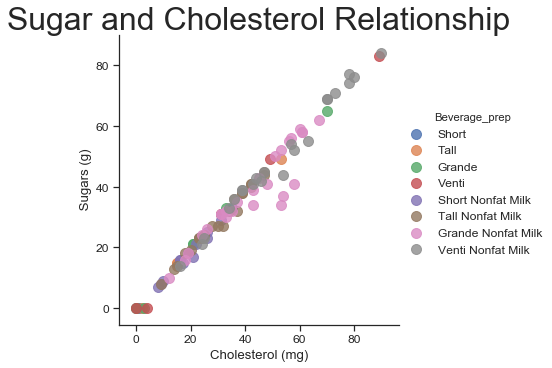

In [18]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Cholesterol (mg)', # Horizontal axis
           ' Sugars (g)', # Vertical axis
           data=s_c, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Beverage_prep", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.title("Sugar and Cholesterol Relationship", fontsize=32)

plt.show()

# CONCLUSION :
    The chart showed the higher the sugar level the higher the amount of choesterol you can get no matter what size you drink.

In [19]:
a= lambda x : x*50
c= lambda x : (x/100)*90
iron=lambda x : (x/100)*18
cal = lambda x :x*10
con_data=data2.copy()


#  conversion of nutrients
##  A to IU 
##  C to mg
##  Iron  to mg
##  Calcium to mg

In [20]:
con_data['Vitamin A (% DV) '] = a(data2['Vitamin A (% DV) '].copy())
con_data['Vitamin C (% DV)'] = c(data2['Vitamin C (% DV)'].copy())
con_data[' Calcium (% DV) '] = cal(data2[' Calcium (% DV) '].copy())
con_data['Iron (% DV) '] = iron(data2['Iron (% DV) '].copy())


In [21]:
con_data.columns=['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (IU) ', 'Vitamin C (mg)',
       ' Calcium (mg) ', 'Iron (mg) ', 'Caffeine (mg)']

# What would happen if you drank every drink in starbucks?

In [22]:
con_data.sum()

Beverage_category            CoffeeCoffeeCoffeeCoffeeClassic Espresso Drink...
Beverage                     Brewed CoffeeBrewed CoffeeBrewed CoffeeBrewed ...
Beverage_prep                ShortTallGrandeVentiShort Nonfat Milk2 MilkSoy...
Calories                                                                 46917
 Total Fat (g)                                                           699.8
Trans Fat (g)                                                            316.3
Saturated Fat (g)                                                          9.1
 Sodium (mg)                                                              1540
 Total Carbohydrates (g)                                                 31190
Cholesterol (mg)                                                          8710
 Dietary Fibre (g)                                                         195
 Sugars (g)                                                               7977
 Protein (g)                                        

In [23]:
#test = data2[(data2['Beverage_prep'].str.contains('Short'))&(data2['Caffeine (mg)']<=200)]
test = data2[data2['Beverage_prep'].str.contains('Short')]

cold_drinks=data2[(data2['Beverage_category'].str.contains('Shaken Iced Beverages'))|(data2['Beverage_category'].str.contains('Smoothies'))|(data2['Beverage_category'].str.contains('FrappuccinoÂ®'))]
hot_drinks=data2[(data2['Beverage_category'].str.contains('Espresso'))|(data2['Beverage'].str.contains('Brewed Coffee'))&(~data2['Beverage'].str.contains('Iced'))|(data2['Beverage_category'].str.contains('TazoÂ® Tea Drinks'))]

h_kid12 = hot_drinks[hot_drinks['Caffeine (mg)']<=45]
h_kid18 = hot_drinks[hot_drinks['Caffeine (mg)']<=45]
h_conditions = hot_drinks[hot_drinks['Caffeine (mg)']<=200]
c_kid12 = cold_drinks[cold_drinks['Caffeine (mg)']<=45]
c_kid18 = cold_drinks[cold_drinks['Caffeine (mg)']<=45]
c_conditions = cold_drinks[cold_drinks['Caffeine (mg)']<=200]


In [24]:
hot_drinks

Beverage_category                                       Beverage  \
0                       Coffee                                  Brewed Coffee   
1                       Coffee                                  Brewed Coffee   
2                       Coffee                                  Brewed Coffee   
3                       Coffee                                  Brewed Coffee   
4      Classic Espresso Drinks                                    Caffè Latte   
5      Classic Espresso Drinks                                    Caffè Latte   
6      Classic Espresso Drinks                                    Caffè Latte   
7      Classic Espresso Drinks                                    Caffè Latte   
8      Classic Espresso Drinks                                    Caffè Latte   
9      Classic Espresso Drinks                                    Caffè Latte   
10     Classic Espresso Drinks                                    Caffè Latte   
11     Classic Espresso Drinks                                    Caffè Latte   
12     Classic Espresso Drinks                                    Caffè Latte   
13     Classic Espresso Drinks                                    Caffè Latte   
14     Classic Espresso Drinks                                    Caffè Latte   
15     Classic Espresso Drinks                                    Caffè Latte   
16     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
17     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
18     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
19     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
20     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
21     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
22     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
23     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
24     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
25     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
26     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
27     Classic Espresso Drinks            Caffè Mocha (Without Whipped Cream)   
28     Classic Espresso Drinks       Vanilla Latte (Or Other Flavoured Latte)   
29     Classic Espresso Drinks       Vanilla Latte (Or Other Flavoured Latte)   
..                         ...                                            ...   
72   Signature Espresso Drinks                              Caramel Macchiato   
73   Signature Espresso Drinks                              Caramel Macchiato   
74   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
75   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
76   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
77   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
78   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
79   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
80   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
81   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
82   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
83   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
84   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
85   Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   
86   Signature Espresso Drinks          Hot Chocolate (Without Whipped Cream)   
87   Signature Espresso Drinks          Hot Chocolate (Without Whipped Cream)   
88   Signature Espresso Drinks          Hot Chocolate (Without Whipped Cream)   
89   Signature Espresso Drinks          Hot 

# Conversion to DV

In [25]:
calories = lambda x : (x/2000)*100 
total_f = lambda x : (x/65)*100
sat_f = lambda x : (x/20)*100
sodium = lambda x : (x/2400)*100
total_carbs = lambda x : (x/300)*100
chol= lambda x : (x/300)*100
dietary_f= lambda x : (x/25)*100
sugar= lambda x : (x/50)*100
protein= lambda x : (x/50)*100
dv_data = cpy.copy()
data2.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [26]:
# converting everything to dv

dv_data['Calories']=calories(cpy['Calories'].copy())
dv_data[' Total Fat (g)'] = total_f(cpy[' Total Fat (g)'].copy())
dv_data['Saturated Fat (g)'] = sat_f(cpy['Saturated Fat (g)'].copy())
dv_data[' Sodium (mg)'] = sodium(cpy[' Sodium (mg)'].copy())
dv_data[' Total Carbohydrates (g) ']=total_carbs(cpy[' Total Carbohydrates (g) '].copy())
dv_data['Cholesterol (mg)'] = chol(cpy['Cholesterol (mg)'].copy() )
dv_data[' Dietary Fibre (g)'] = dietary_f(cpy[' Dietary Fibre (g)'].copy())
dv_data[' Sugars (g)']=sugar(cpy[' Sugars (g)'].copy())
dv_data[' Protein (g) ']=protein(cpy[' Protein (g) '].copy())

#calories(data2['Calories'])

# Health conversion
low_attribute= 0-5 DV <br> 
high_attribute=20-100 DV <br>
from: https://www.fda.gov/Food/ResourcesForYou/Consumers/ucm267499.htm

In [27]:
healthy_drinks=dv_data[(dv_data['Calories']<20)&(dv_data['Saturated Fat (g)'] <20)&(dv_data[' Sodium (mg)'] <20)&(dv_data[' Total Carbohydrates (g) ']<20)&(dv_data['Cholesterol (mg)']<20)& (dv_data[' Dietary Fibre (g)']>20)&(dv_data[' Sugars (g)']<20)&(dv_data[' Protein (g) ']>20)]

In [28]:

low_calorie_drinks=dv_data[(dv_data['Calories']<20)&(dv_data[' Total Fat (g)']<20)&(dv_data['Saturated Fat (g)'] <20)&(dv_data[' Sodium (mg)'] <20)&(dv_data[' Total Carbohydrates (g) ']<20)&(dv_data['Cholesterol (mg)']<20)&(dv_data[' Sugars (g)']<20)]
low_calorie_drinks
low_calorie_drinks

Beverage_category         Beverage Beverage_prep  Calories  \
0                    Coffee    Brewed Coffee         Short      0.15   
1                    Coffee    Brewed Coffee          Tall      0.20   
2                    Coffee    Brewed Coffee        Grande      0.25   
3                    Coffee    Brewed Coffee         Venti      0.25   
40  Classic Espresso Drinks  Caffè Americano         Short      0.25   
41  Classic Espresso Drinks  Caffè Americano          Tall      0.50   
42  Classic Espresso Drinks  Caffè Americano        Grande      0.75   
43  Classic Espresso Drinks  Caffè Americano         Venti      1.25   
46  Classic Espresso Drinks       Cappuccino       Soymilk      2.50   
56  Classic Espresso Drinks         Espresso          Solo      0.25   
57  Classic Espresso Drinks         Espresso        Doppio      0.50   

     Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0         0.153846             0.0                0.0           0.0   
1         0.153846             0.0                0.0           0.0   
2         0.153846             0.0                0.0           0.0   
3         0.153846             0.0                0.0           0.0   
40        0.000000             0.0                0.0           0.0   
41        0.000000             0.0                0.0           0.0   
42        0.000000             0.0                0.0           0.0   
43        0.000000             0.0                0.0           0.0   
46        2.307692             0.2                0.0           0.0   
56        0.000000             0.0                0.0           0.0   
57        0.000000             0.0                0.0           0.0   

     Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                    1.666667          0.000000                 0.0   
1                    3.333333          0.000000                 0.0   
2                    3.333333          0.000000                 0.0   
3                    3.333333          0.000000                 0.0   
40                   1.666667          0.333333                 0.0   
41                   3.333333          0.666667                 0.0   
42                   5.000000          1.000000                 0.0   
43                   5.000000          1.333333                 0.0   
46                  13.333333          1.333333                 0.0   
56                   0.000000          0.333333                 0.0   
57                   0.333333          0.666667                 0.0   

     Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0           0.0            0.6                  0                 0   
1           0.0            1.0                  0                 0   
2           0.0            2.0                  0                 0   
3           0.0            2.0                  0                 0   
40          0.0            0.8                  0                 0   
41          0.0            2.0                  0                 0   
42          0.0            2.0                  0                 0   
43          0.0            2.0                  0                 0   
46          6.0            6.0                  4                 0   
56          0.0            0.8                  0                 0   
57          0.0            2.0                  0                 0   

     Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
0                  0           0.0            175  
1                  0           0.0            260  
2                  0           0.0            330  
3                  2           0.0            410  
40                 0           0.0             75  
41                 2           0.0            150  
42                 2           0.0            225  
43                 2           0.0            300  
46                10           6.0             75  
56                 0           0.0             75  
57            

# Other solution

In [29]:
names = dv_data['Beverage']
cal20 = dv_data['Calories'].where(dv_data['Calories']<20)
total_fat = dv_data[' Total Fat (g)'].where(dv_data[' Total Fat (g)']<20 )
sat_fat = dv_data['Saturated Fat (g)'].where(dv_data['Saturated Fat (g)']<20 )
sodium = dv_data[' Sodium (mg)'].where(dv_data[' Sodium (mg)']<20 )
total_carb =  dv_data[' Total Carbohydrates (g) '].where(dv_data[' Total Carbohydrates (g) ']<20)
chol =  dv_data['Cholesterol (mg)'].where(dv_data['Cholesterol (mg)']<20)
sugar =  dv_data[' Sugars (g)'].where(dv_data[' Sugars (g)']<20)
healthy = names.to_frame().join(dv_data['Beverage_prep'].to_frame()).join(cal20.to_frame()).join(total_fat.to_frame()).join(sat_fat.to_frame()).join(sodium.to_frame() ).join(chol.to_frame()).join(sugar.to_frame()).join(total_carb.to_frame())
healthy.dropna()

Beverage Beverage_prep  Calories   Total Fat (g)  \
0     Brewed Coffee         Short      0.15        0.153846   
1     Brewed Coffee          Tall      0.20        0.153846   
2     Brewed Coffee        Grande      0.25        0.153846   
3     Brewed Coffee         Venti      0.25        0.153846   
40  Caffè Americano         Short      0.25        0.000000   
41  Caffè Americano          Tall      0.50        0.000000   
42  Caffè Americano        Grande      0.75        0.000000   
43  Caffè Americano         Venti      1.25        0.000000   
46       Cappuccino       Soymilk      2.50        2.307692   
56         Espresso          Solo      0.25        0.000000   
57         Espresso        Doppio      0.50        0.000000   

    Saturated Fat (g)   Sodium (mg)  Cholesterol (mg)   Sugars (g)  \
0                 0.0           0.0          0.000000          0.0   
1                 0.0           0.0          0.000000          0.0   
2                 0.0           0.0          0.000000          0.0   
3                 0.0           0.0          0.000000          0.0   
40                0.0           0.0          0.333333          0.0   
41                0.0           0.0          0.666667          0.0   
42                0.0           0.0          1.000000          0.0   
43                0.0           0.0          1.333333          0.0   
46                0.0           0.0          1.333333          6.0   
56                0.0           0.0          0.333333          0.0   
57                0.0           0.0          0.666667          0.0   

     Total Carbohydrates (g)   
0                    1.666667  
1                    3.333333  
2                    3.333333  
3                    3.333333  
40                   1.666667  
41                   3.333333  
42                   5.000000  
43                   5.000000  
46                  13.333333  
56                   0.000000  
57                   0.333333

# These are the drinks that have<br>
     Low calories 
     Low Total Fat (g) 
     Low Saturated Fat (g) 
     Low Sodium (mg) 
     Low Cholesterol (mg) 
     Low Sugars (g) 
     Low Total Carbohydrates (g) 

# Highest nutrient drink

In [30]:
most_nutrients=dv_data[(dv_data['Vitamin A (% DV) ']>20)&(dv_data['Vitamin C (% DV)']>20)&(dv_data['Iron (% DV) ']>20)]
most_nutrients

Beverage_category                      Beverage       Beverage_prep  \
175         Smoothies  Orange Mango Banana Smoothie  Grande Nonfat Milk   

     Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
175      13.0        1.538462             0.3                0.0   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
175      0.208333                       40.0              18.0   

      Dietary Fibre (g)   Sugars (g)   Protein (g)   Vitamin A (% DV)   \
175                24.0         74.0           32.0                 50   

     Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   Caffeine (mg)  
175                80                10          30.0             15

In [31]:

weather = int(input("weather\n1: hot\n2: cold \n"))
while(weather<1 and weather>=3):
    print("invalid input ")
    weather = input("weather\n1: hot\n2: cold \n")
condition = int(input("1:diabetic \n2:Pregnant \n3:heartConditions\n4:None\n "))
while(condition <1 and condition >5):
    print("invalid input ")
    condition = int(input("1:diabetic \n2:Pregnant \n3:heartConditions\n4:None\n "))
age = int(input("Enter Age"))
while(age<0 and age>200):
    print("invalid input ")
    age = int(input("Enter Age"))
    
if condition != 4:
    if weather == 1:
        print(c_conditions.sample())
    else:
        print(h_conditions.sample())
else:
    if age <=12 :
        if weather == 1:
            print(c_kid12.sample())
        else :
            print(h_kid12.sample())
    elif age<=18:
        if weather == 1:
            print(c_kid18.sample())
        else:
            print(h_kid18.sample())
    else:
        if weather == 1:
            print(cold_drinks.sample())
        else:
            print(hot_drinks.sample())
        
        

KeyboardInterrupt: 